In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Breast_cancer_data.csv')

In [3]:
print(df.head(10))#Print all data of top 10 rows
print(df.shape)#Print the row and clumn count of the data
print(df.isna().sum())#Print all columns with empty data along with sum of empty data

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [4]:
df=df.dropna(axis=1)

In [5]:
print(df.isna().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


B    357
M    212
Name: diagnosis, dtype: int64


c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst 

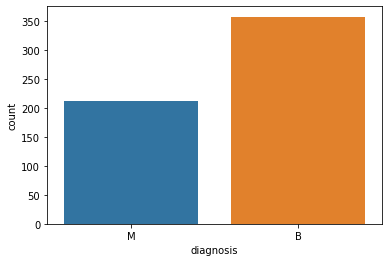

In [6]:
print(df['diagnosis'].value_counts())#Get the count of melignant and benign cells
print(sns.countplot(df['diagnosis'],label='counts'))#Visualize the data of diagnosis column with y label counts
print(df.dtypes)#Data type of data in each column

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()#Calling LabelEncoder
df.iloc[:,1]=labelencoder_X.fit_transform(df.iloc[:,1].values)#Encoding the values of diagnosis column to values

In [8]:
X=df.iloc[:,2:31].values#Features of cancerous and non cancerous patients
Y=df.iloc[:,1].values#Whether patient has cancer or not

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [10]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)#Scaling X_train
X_test=sc.fit_transform(X_test)#Scaling X_test

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [12]:
def models(X_train,Y_train):

    #Logistic regression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)

    #Decision tree
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,Y_train)

    #Random forest classifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(X_train,Y_train)

    #GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train,Y_train)

    #Printing accuracy
    print("Logistic regression:",log.score(X_train,Y_train))
    print("Decision Tree:",tree.score(X_train,Y_train))
    print("Random Forest:",forest.score(X_train,Y_train))
    print("GaussianNB:",gnb.score(X_train,Y_train))
    return log,tree,forest,gnb

In [13]:
#Testing Function for all models
print("Accuracy")
model=models(X_train,Y_train)

Accuracy
Logistic regression: 0.9906103286384976
Decision Tree: 1.0
Random Forest: 0.9953051643192489
GaussianNB: 0.9507042253521126


In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
    print("\nModel",i+1)
    print("Classification Report")
    print(classification_report(Y_test,model[i].predict(X_test)))
    print("Accuracy Score:",accuracy_score(Y_test,model[i].predict(X_test)))


Model 1
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

Accuracy Score: 0.951048951048951

Model 2
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

Accuracy Score: 0.9370629370629371

Model 3
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy        

In [15]:
from sklearn.metrics import confusion_matrix

for i in range( len(model)):
  print('Model', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy = ',(TP + TN)/(TP + TN + FN + FP))
  print()

Model 0
[[86  4]
 [ 3 50]]
Testing Accuracy =  0.951048951048951

Model 1
[[83  7]
 [ 2 51]]
Testing Accuracy =  0.9370629370629371

Model 2
[[87  3]
 [ 2 51]]
Testing Accuracy =  0.965034965034965

Model 3
[[87  3]
 [ 5 48]]
Testing Accuracy =  0.9440559440559441

